Creating a regression model to predict price of laptops

## Load Data and Required Libraries
n this homework, we will use the Laptops price dataset from Kaggle.

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv


--2024-10-09 08:18:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.03s   

2024-10-09 08:18:23 (9.11 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



In [42]:
laptops = pd.read_csv('laptops.csv')
laptops

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


## Preparing the dataset


1.   Transforming the names of the columns to lowercase and put underlines instead of spaces
2.   Extracting the columns ```ram```, ```storage```, ```screen```, ```final_price```
3.	Look at the final_price variable. Does it have a long tail?



In [43]:
# Transforming the names of the columns to lowercase and put underlines instead of spaces
laptops.columns = laptops.columns.str.lower().str.replace(' ', '_')
laptops.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [44]:
# Extracting the columns 'ram', 'storage', 'screen', 'final_price'
base = ['ram', 'storage', 'screen', 'final_price']
data = laptops[base]
data

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


Text(0.5, 1.0, 'Distribution of prices')

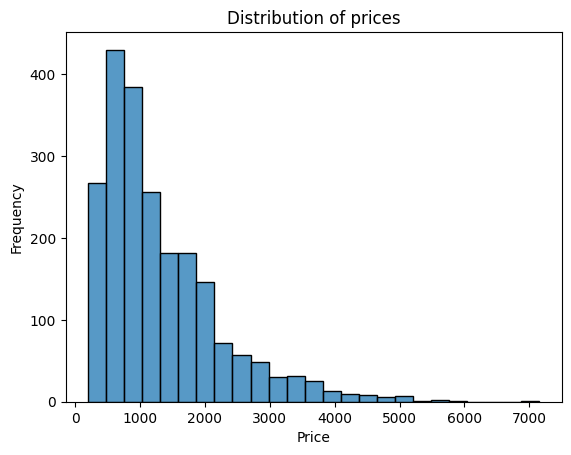

In [45]:
# Looking at the final_price variable. Does it have a long tail?
# Yes. this is a long-tailed distribution
sns.histplot(data.final_price, bins=25)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

Text(0.5, 1.0, 'Distribution of log+1 of prices')

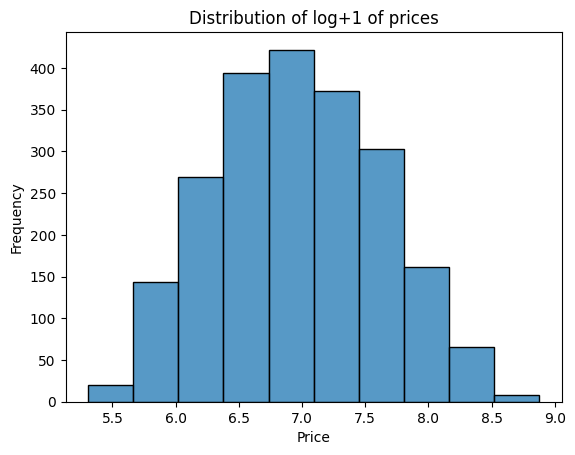

In [46]:
Y = np.log1p(data.final_price.values)
sns.histplot(Y, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of log+1 of prices')

## Question 1
There's one column with missing values. What is it?

In [47]:
data.isnull().sum()

# the column 'screen' has null values

,0
ram,0
storage,0
screen,4
final_price,0


## Question 2
What's the median (50% percentile) for variable ```'ram'```

In [48]:
median_ram = data.ram.median()
median_ram

16.0

## Prepare and split the dataset
*   Shuffle the dataset (the filtered one you created above), use seed 42.
*   Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [60]:
# Shuffle the dataset (the filtered one you created above), use seed 42.
np.random.seed(42)
N   = len(data)
idx = np.arange(N)
np.random.shuffle(idx)

# data = data.drop(columns='final_price')

# Split your data in train/val/test sets, with 60%/20%/20% distribution.
N_val   = int(0.2 * N)
N_test  = int(0.2 * N)
N_train = N - N_val - N_test

X_train = data.iloc[idx[: N_train]]
X_val   = data.iloc[idx[N_train : N_train+N_val]]
X_test  = data.iloc[idx[N_train+N_val:]]

# we should replace y with log+1 value to fix the distrobution
# y_train = np.log1p(X_train.final_price.values)
# y_val   = np.log1p(X_val.final_price.values)
# y_test  = np.log1p(X_test.final_price.values)
y_train = (X_train.final_price.values)
y_val   = (X_val.final_price.values)
y_test  = (X_test.final_price.values)

# reset the indices so they are ordered again
data_train = X_train.reset_index( drop = True )
data_val   =   X_val.reset_index( drop = True )
data_test  =  X_test.reset_index( drop = True )

del X_train['final_price']
del X_val[  'final_price']
del X_test[ 'final_price']

In [50]:
(y_train == 'nan').astype('int').sum()

0

## Question 3
*   We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the **training** only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [51]:
# defining required functions:
#=====================================================================
#  training a linear regression function
#=====================================================================

def train_linear_regression(X, y):
    '''
    Simple Linear regression function with completely cleaned data
    '''
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]
#=====================================================================
# MSRE function
#=====================================================================

def rmse(y, y_pred):
    '''
    RMSE function
    '''
    MSE = ((y_pred - y) ** 2).mean()
    return np.sqrt(MSE)

Comparing the values above it is evident that both models are almost equally good

In [79]:
filling_vlaues = [0,  X_train.screen.mean() ]
for val in filling_vlaues:
  X_train_clean = X_train.copy()
  X_train_clean = X_train_clean.fillna( val)

  X_val_clean = X_val.copy()
  X_val_clean = X_val_clean.fillna( val)

  # train linear regression with cleaned data(using mean values and zero)
  w_0, w = train_linear_regression(X_train_clean, y_train) #trining the data

  # finding predicted y
  y_pred =  w_0 + X_val_clean.dot(w)

  # RMSE for this dataset
  RMSE = rmse(y_val, y_pred).round(2)

  #printing the result in the required format
  print('RMSE when we used %2d to clean X is %.2f'%(val, RMSE))

RMSE when we used  0 to clean X is 597.36
RMSE when we used 15 to clean X is 600.27


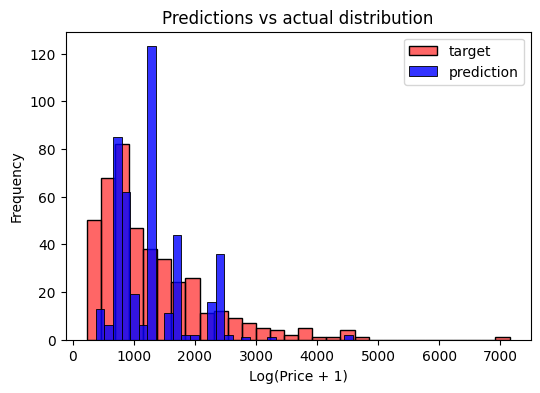

In [53]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='red', alpha=0.6, bins=30)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=30)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

As we see, we should do better in training the model and engineering the features, but the predictions are not very bad. They are not biased

## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with ```0```.
* Try different values of r from this list: ```[0, 0.01, 0.1, 1, 5, 10, 100].```
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
Which ```r``` gives the best RMSE?

In [63]:
# defining required functions:
#=====================================================================
#  training a Regularized linear regression function
#=====================================================================

def train_regularized_linear_regression(X, y, r=0):
    '''
    Simple Linear regression function with completely cleaned data
    and regularization (adding small values to diagonal elements of
    data so that the reversed matrix exist and has finite small values)
    '''
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [81]:
# regularization parameter
reg_param = [0, 0.01, 0.1, 1, 10, 100]
RMSE = []
X_train_clean = X_train.copy()
X_train_clean = X_train_clean.fillna( 0)

X_val_clean = X_val.copy()
X_val_clean = X_val_clean.fillna( 0)

best_rmse = float('inf')
best_r = None

for r in reg_param:
    w_0, w = train_regularized_linear_regression(X_train_clean, y_train, r=r)
    RMSE.append( rmse(y_val, w_0 + X_val_clean.dot(w)).round(5) )
    print('r = %6.2f, RMSE = s %.3f'%(r, RMSE[-1]))
    if  RMSE[-1] < best_rmse:
          best_rmse =  RMSE[-1]
          best_r = r

print(f'The best r is {best_r}, with RMSE = {round(best_rmse,2)}')

r =   0.00, RMSE = s 597.364
r =   0.01, RMSE = s 597.362
r =   0.10, RMSE = s 597.345
r =   1.00, RMSE = s 597.212
r =  10.00, RMSE = s 597.059
r = 100.00, RMSE = s 597.903
The best r is 10, with RMSE = 597.06


The best value is for ```r = 0.1```, after that ```r = 1``` and then ```r = 0.01```

## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: ```[0, 1, 2, 3, 4, 5, 6, 7, 8, 9].```
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits ```(round(std, 3))```
What's the value of std?

In [ ]:
#=====================================================================
#  Data Preparation
#=====================================================================
# Shuffle the dataset (the filtered one you created above), use
# a list of seeds.
RMSE = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    N   = len(data)
    idx = np.arange(N)
    np.random.shuffle(idx)

    # data = data.drop(columns='final_price')

    # Split your data in train/val/test sets, with 60%/20%/20% distribution.
    N_val   = int(0.2 * N)
    N_test  = int(0.2 * N)
    N_train = N - N_val - N_test

    X_train = data.iloc[idx[: N_train]]
    X_val   = data.iloc[idx[N_train : N_train+N_val]]
    X_test  = data.iloc[idx[N_train+N_val:]]

    # we should replace y with log+1 value to fix the distrobution
    # y_train = np.log1p(X_train.final_price.values)
    # y_val   = np.log1p(X_val.final_price.values)
    # y_test  = np.log1p(X_test.final_price.values)
    y_train = (X_train.final_price.values)
    y_val   = (X_val.final_price.values)
    y_test  = (X_test.final_price.values)

    # reset the indices so they are ordered again
    data_train = X_train.reset_index( drop = True )
    data_val   =   X_val.reset_index( drop = True )
    data_test  =  X_test.reset_index( drop = True )

    del X_train['final_price']
    del X_val[  'final_price']
    del X_test[ 'final_price']

    #=====================================================================
    #  training a Regularized linear regression function
    #=====================================================================

    X_train_clean = X_train.copy()
    X_train_clean = X_train_clean.fillna(0)

    # train linear regression with cleaned data(using mean values and zero)
    w_0, w =train_regularized_linear_regression(X_train_clean, y_train, r=1) #trining the data

    # finding predicted y
    y_pred =  w_0 + X_val.dot(w)

    # RMSE for this dataset
    RMSE.append( rmse(y_val, y_pred))

    #printing the result in the required format
    print('RMSE when we used %2d as seed is %.4f'%(seed, RMSE[-1]))

RMSE = np.array(RMSE)
std  = round(np.std(RMSE), 3)

print("standard deviation of RMSE is %.3f"%(std))

##Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [82]:
print(X_train.shape, y_train.shape)
print(X_val.shape  , y_val.shape)

X_train_val = pd.concat([X_train, X_val])

print(X_train_val.shape,X_train.shape[0]+X_val.shape[0] )

X_train_val       = X_train_val.reset_index(drop=True)

X_train_val_clean = X_train_val.copy()
X_train_val_clean = X_train_val_clean.fillna(0)

y_train_val = np.concatenate([y_train, y_val])

print(y_train_val.shape)

X_train_val

(1296, 3) (1296,)
(432, 3) (432,)
(1728, 3) 1728
(1728,)


,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0
...,...,...,...
1723,8,128,13.0
1724,8,256,13.3
1725,8,512,14.0
1726,16,512,14.0


In [83]:
w_0, w =train_regularized_linear_regression(X_train_val_clean, y_train_val, r=0.001) #trining the data
w_0, w

y_train_val_pred =  w_0 + X_train_val_clean.dot(w)

RMSE = rmse(y_train_val, y_train_val_pred)
RMSE

600.7605216832325